In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
from pymongo import MongoClient
client = MongoClient()
db = client['gtr']

In [2]:
repo_targets = {}
for doc in db['repo_core_targets'].find():
    if doc['target_teams']:
        repo_targets[doc['repo']] = doc['target_teams']

In [3]:
def NDCG(repo,rec,repo_targets):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in repo_targets[repo]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in repo_targets[repo]:
        target_cnt += 1
        idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

In [4]:
mins = {}
maxs = {}
means = {}
ks = [5,10,30,50]

In [5]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_contri_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

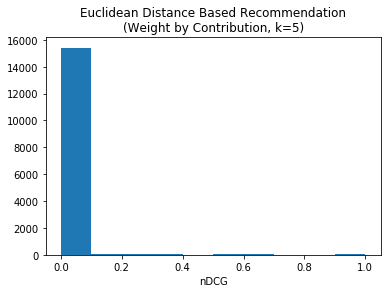

0.0 1.0
0.0067837357984312134


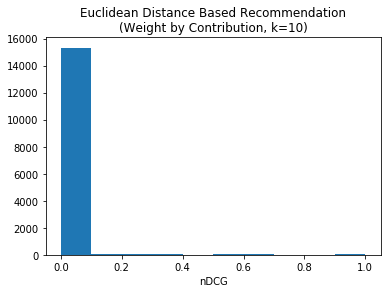

0.0 1.0
0.008368693607222807


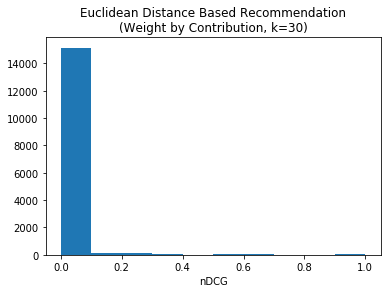

0.0 1.0
0.010962385717058685


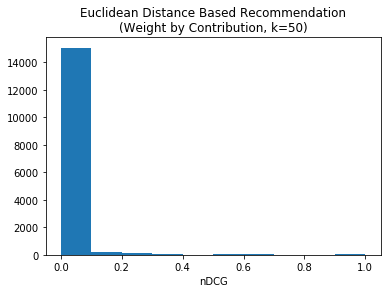

0.0 1.0
0.012088249491295075


In [6]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Weight by Contribution, k=%d)"%k)
    plt.savefig('evaluate_euclidean_contri_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_contri_%d'%k] = min(NDCGs)
    maxs['euc_contri_%d'%k] = max(NDCGs)
    means['euc_contri_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [7]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_degree_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

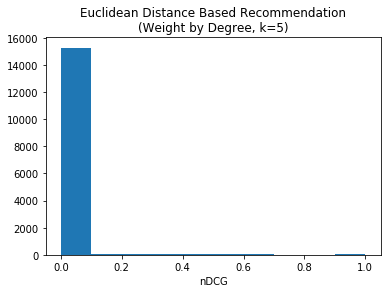

0.0 1.0
0.011841899701975255


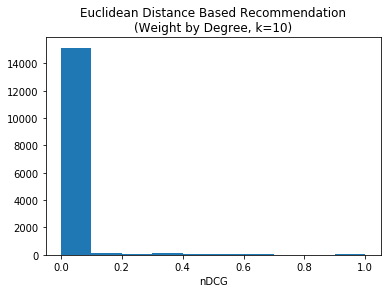

0.0 1.0
0.014336751940299727


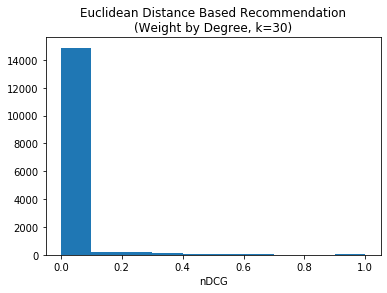

0.0 1.0
0.018475520399760373


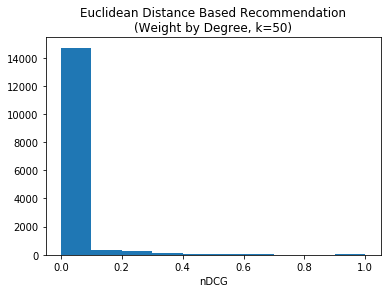

0.0 1.0
0.020666768504283606


In [8]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Weight by Degree, k=%d)"%k)
    plt.savefig('evaluate_euclidean_degree_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_degree_%d'%k] = min(NDCGs)
    maxs['euc_degree_%d'%k] = max(NDCGs)
    means['euc_degree_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [9]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_min_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

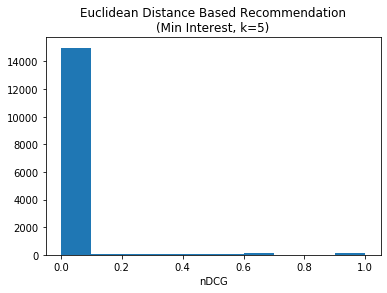

0.0 1.0
0.023193403783135575


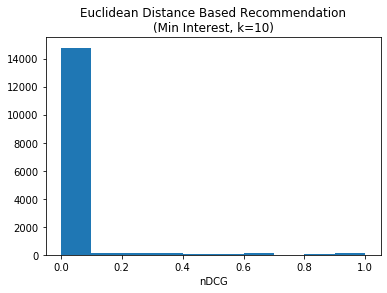

0.0 1.0
0.028052564230101763


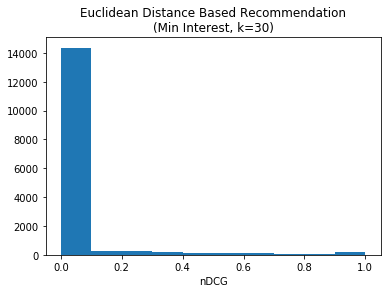

0.0 1.0
0.03657771337729444


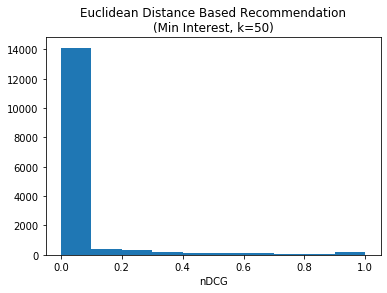

0.0 1.0
0.0406982763671667


In [10]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Min Interest, k=%d)"%k)
    plt.savefig('evaluate_euclidean_min_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_min_%d'%k] = min(NDCGs)
    maxs['euc_min_%d'%k] = max(NDCGs)
    means['euc_min_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [11]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_max_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

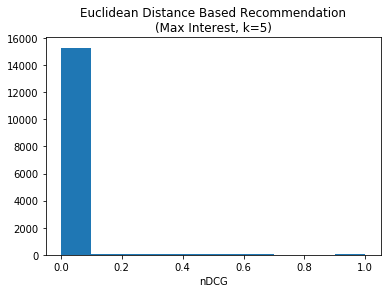

0.0 1.0
0.010656203368296693


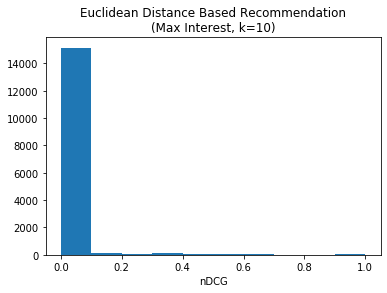

0.0 1.0
0.013250363054961859


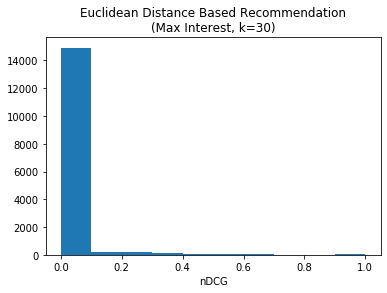

0.0 1.0
0.016883941027434426


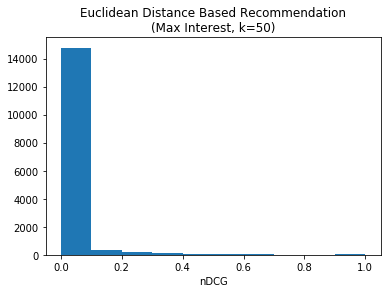

0.0 1.0
0.0188702072319722


In [12]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Max Interest, k=%d)"%k)
    plt.savefig('evaluate_euclidean_max_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_max_%d'%k] = min(NDCGs)
    maxs['euc_max_%d'%k] = max(NDCGs)
    means['euc_max_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [13]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_mean_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

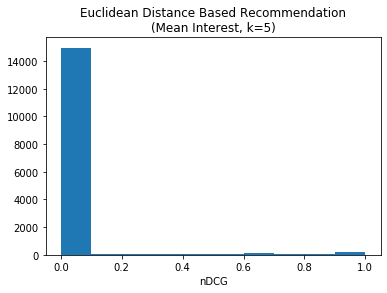

0.0 1.0
0.025974303346286573


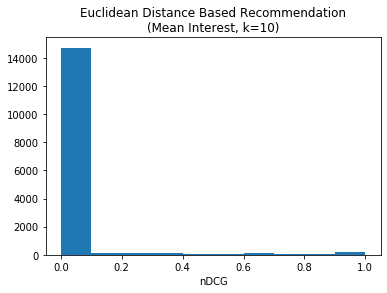

0.0 1.0
0.031820562039174285


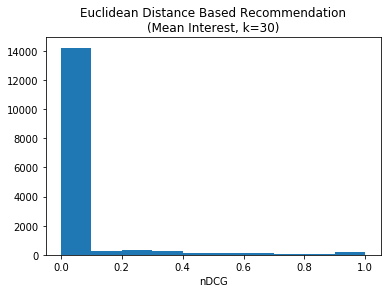

0.0 1.0
0.041877721757446855


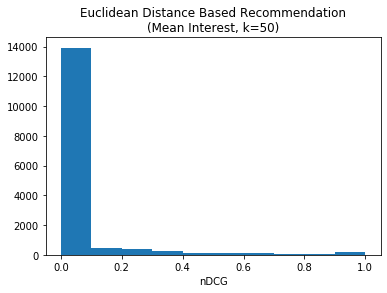

0.0 1.0
0.04699946456890074


In [14]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Mean Interest, k=%d)"%k)
    plt.savefig('evaluate_euclidean_mean_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_mean_%d'%k] = min(NDCGs)
    maxs['euc_mean_%d'%k] = max(NDCGs)
    means['euc_mean_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [15]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_euclidean_team_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

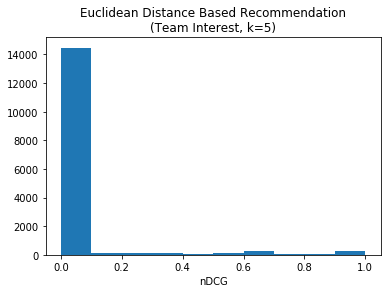

0.0 1.0
0.04306501866451894


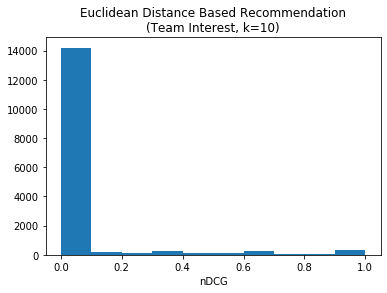

0.0 1.0
0.049868594010872395


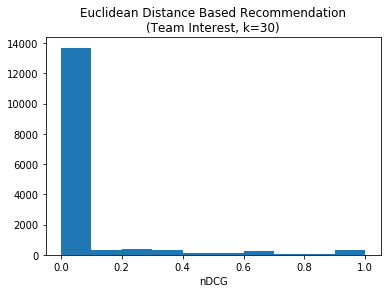

0.0 1.0
0.05987204647743298


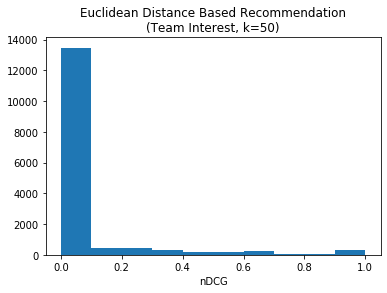

0.0 1.0
0.06415927670324825


In [16]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Euclidean Distance Based Recommendation\n(Team Interest, k=%d)"%k)
    plt.savefig('evaluate_euclidean_team_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['euc_team_%d'%k] = min(NDCGs)
    maxs['euc_team_%d'%k] = max(NDCGs)
    means['euc_team_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [17]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_gat_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

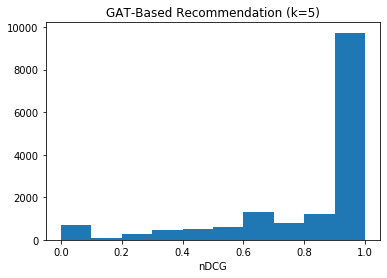

0.0 1.0
0.8274364960183918


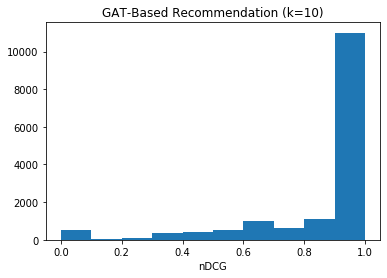

0.0 1.0
0.8694875571544237


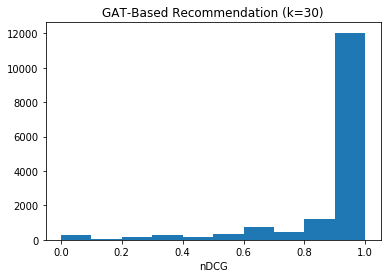

0.0 1.0
0.9017267589623763


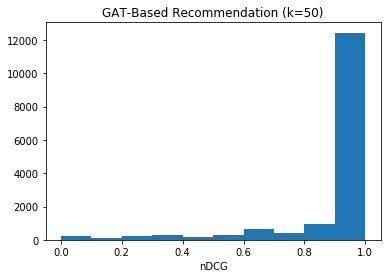

0.0 1.0
0.9081243124097975


In [18]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("GAT-Based Recommendation (k=%d)"%k)
    plt.savefig('evaluate_gat_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['gat_%d'%k] = min(NDCGs)
    maxs['gat_%d'%k] = max(NDCGs)
    means['gat_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [19]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_gat_alt1_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

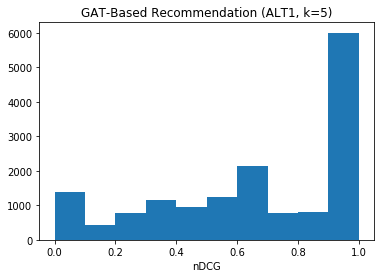

0.0 1.0
0.6608050759751424


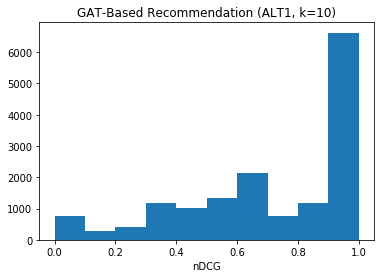

0.0 1.0
0.7154260427829751


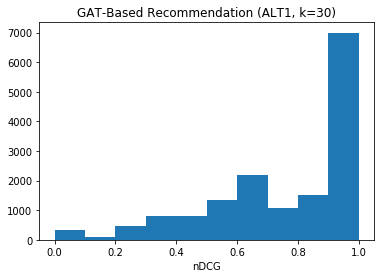

0.0 1.0
0.7618001857773391


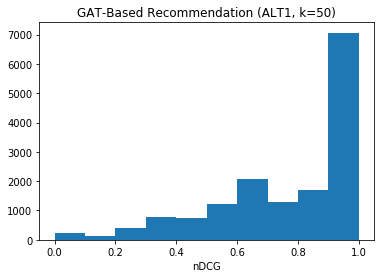

0.0 1.0
0.7719390499818034


In [20]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("GAT-Based Recommendation (ALT1, k=%d)"%k)
    plt.savefig('evaluate_gat_alt1_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['gat_alt1_%d'%k] = min(NDCGs)
    maxs['gat_alt1_%d'%k] = max(NDCGs)
    means['gat_alt1_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [21]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_gat_alt2_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

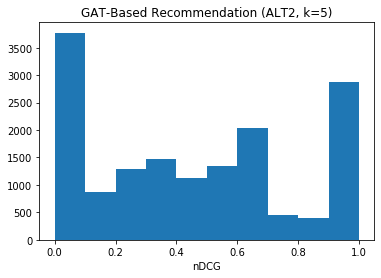

0.0 1.0
0.4493707941983757


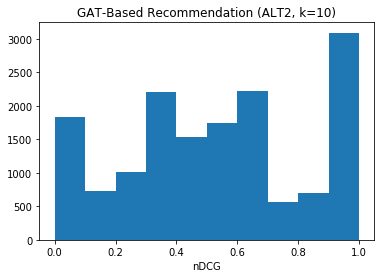

0.0 1.0
0.5281159885041851


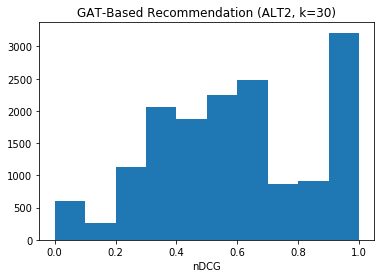

0.0 1.0
0.5927826903481458


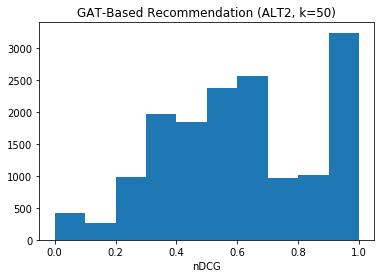

0.0 1.0
0.6076450181590084


In [22]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("GAT-Based Recommendation (ALT2, k=%d)"%k)
    plt.savefig('evaluate_gat_alt2_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['gat_alt2_%d'%k] = min(NDCGs)
    maxs['gat_alt2_%d'%k] = max(NDCGs)
    means['gat_alt2_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))

In [23]:
recommendations = {}
for k in ks:
    recommendations[k] = {}
    with open('recommend_social_%d.json'%k) as rj:
        for l in rj.readlines():
            line = l.strip().split('\t')
            repo = line[0]
            if not repo in repo_targets:
                continue
            recs = [json.loads(r)[0] for r in line[1:]]
            recommendations[k][repo] = recs

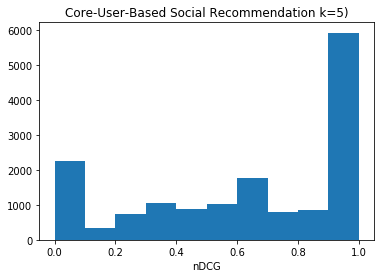

0.0 1.0
0.6333926834521831


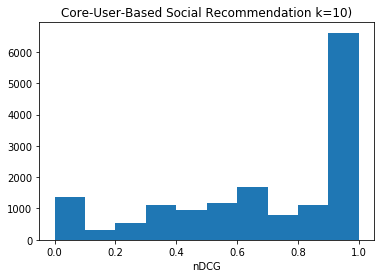

0.0 1.0
0.6894982788502019


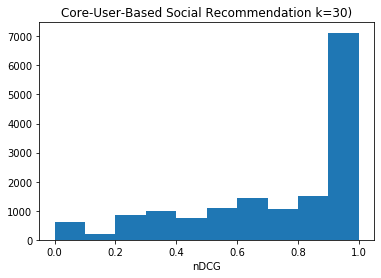

0.0 1.0
0.7376025802253717


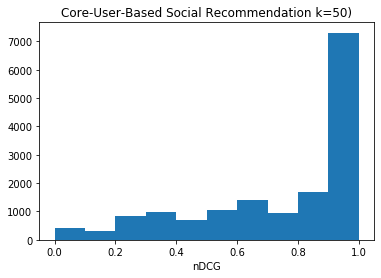

0.0 1.0
0.7491974714331677


In [24]:
for k in ks:
    NDCGs = []
    for repo in recommendations[k]:
        NDCGs.append(NDCG(repo,recommendations[k][repo],repo_targets))
    plt.hist(NDCGs)
    plt.xlabel("nDCG")
    plt.title("Core-User-Based Social Recommendation k=%d)"%k)
    plt.savefig('evaluate_social_%d.jpg'%k,bbox='tight')
    plt.show()
    mins['social_%d'%k] = min(NDCGs)
    maxs['social_%d'%k] = max(NDCGs)
    means['social_%d'%k] = sum(NDCGs)/len(NDCGs)
    print(min(NDCGs),max(NDCGs))
    print(sum(NDCGs)/len(NDCGs))


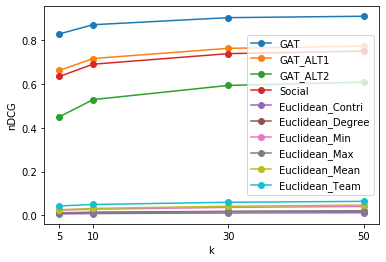

In [25]:
plt.plot(ks,[means['gat_%d'%k] for k in ks],marker='o',label='GAT')
plt.plot(ks,[means['gat_alt1_%d'%k] for k in ks],marker='o',label='GAT_ALT1')
plt.plot(ks,[means['gat_alt2_%d'%k] for k in ks],marker='o',label='GAT_ALT2')
plt.plot(ks,[means['social_%d'%k]  for k in ks],marker='o',label='Social')
plt.plot(ks,[means['euc_contri_%d'%k]  for k in ks],marker='o',label='Euclidean_Contri')
plt.plot(ks,[means['euc_degree_%d'%k]  for k in ks],marker='o',label='Euclidean_Degree')
plt.plot(ks,[means['euc_min_%d'%k]  for k in ks],marker='o',label='Euclidean_Min')
plt.plot(ks,[means['euc_max_%d'%k]  for k in ks],marker='o',label='Euclidean_Max')
plt.plot(ks,[means['euc_mean_%d'%k]  for k in ks],marker='o',label='Euclidean_Mean')
plt.plot(ks,[means['euc_team_%d'%k]  for k in ks],marker='o',label='Euclidean_Team')

plt.xticks(ks)
plt.legend()
plt.xlabel('k')
plt.ylabel('nDCG')
plt.savefig('evaluate_compare.jpg',bbox='tight')
plt.show()